# Crypto Currency Analysis

This notebook demonstrates various methods for analyzing cryptocurrency fluctuations stored in a `CSV` file using the `automated_API_runner.py` script. The `CSV` file contains data for 15 different cryptocurrencies retrieved over a 12-hour period with 30-minute intervals.

In [1]:
# Importing necessary libraries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
from time import time
from time import sleep
import seaborn as sns
import datetime

In [2]:
# Setting options to have a better visualization with Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df = pd.read_csv('Coinmarket_15Currencies_12hr_30Apr.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19692040.00000,19692040.00000,False,NaN,1,NaN,NaN,NaN,2024-04-30T07:08:00.000Z,63382.02109,25537898308.18334,26.97780,0.20831,2.05962,-4.61547,-9.84408,2.73136,47.55761,1248121294505.94287,53.41850,1331022442805.56006,NaN,2024-04-30T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612
1,1,1027,Ethereum,ETH,ethereum,8880,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122056395.21776,122056395.21776,True,NaN,2,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,3170.26431,12968534373.05963,-1.95920,0.14498,-0.24286,-0.25266,-12.43785,-6.45776,35.96198,386951033158.47961,16.55780,386951033158.47998,NaN,2024-04-30T07:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612
2,2,825,Tether USDt,USDT,tether,84380,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110643229581.36777,113086550461.59590,True,NaN,3,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,0.99997,47339888560.51557,17.29630,0.02572,0.00481,-0.06359,-0.01094,-0.00420,0.04347,110640158068.00676,4.73430,113083411120.38000,NaN,2024-04-30T07:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-30 07:08:52.264612
3,3,1839,BNB,BNB,bnb,2153,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587857.40731,147587857.40731,False,NaN,4,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,601.59015,894533194.49211,14.85130,0.36999,2.81329,-0.12001,-0.62874,48.52967,96.49120,88787401050.06248,3.79920,88787401050.06000,NaN,2024-04-30T07:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,447321920.03840,574911869.83016,True,NaN,5,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,135.85395,2556181951.24816,25.94190,0.27218,0.72086,-12.16031,-30.36105,1.59606,35.41372,60770448245.24078,2.60040,78104046473.03999,NaN,2024-04-30T07:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612
5,5,3408,USDC,USDC,usd-coin,18758,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33388037130.73970,33388037130.73970,False,NaN,6,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,1.00010,6213665432.12230,35.54260,0.01783,0.01023,0.00301,0.01312,0.02998,-0.00141,33391258449.24315,1.42880,33391258449.24000,NaN,2024-04-30T07:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-30 07:08:52.264612
6,6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,NaN,2024-04-30T07:08:00.000Z,0.51351,1027818941.98527,26.81600,-0.11537,2.13136,-6.66813,-18.04113,-12.92593,0.45571,28364079171.82880,1.21370,51350792529.83000,NaN,2024-04-30T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612
7,7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144093526383.70523,144093526383.70523,True,NaN,8,NaN,NaN,NaN,2024-04-30T07:08:00.000Z,0.14286,956687084.87441,25.72530,0.32655,1.17548,-9.76810,-30.62837,17.86293,79.50296,20584892413.70944,0.88080,20584892413.71000,NaN,2024-04-30T07:08:00.000Z,

We want to use the timestamp in visualization, however, the column needs to be formatted. Since all the data is collected within the same day, we will format the timestamps to display only the time of day.

In [4]:
def format_timestamp(timestamp):
    return timestamp.split(' ')[1].split('.')[0][:-3]
df['Timestamp_formatted'] = df['Timestamp'].apply(format_timestamp)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp,Timestamp_formatted
0,0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19692040.00000,19692040.00000,False,NaN,1,NaN,NaN,NaN,2024-04-30T07:08:00.000Z,63382.02109,25537898308.18334,26.97780,0.20831,2.05962,-4.61547,-9.84408,2.73136,47.55761,1248121294505.94287,53.41850,1331022442805.56006,NaN,2024-04-30T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612,07:08
1,1,1027,Ethereum,ETH,ethereum,8880,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122056395.21776,122056395.21776,True,NaN,2,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,3170.26431,12968534373.05963,-1.95920,0.14498,-0.24286,-0.25266,-12.43785,-6.45776,35.96198,386951033158.47961,16.55780,386951033158.47998,NaN,2024-04-30T07:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612,07:08
2,2,825,Tether USDt,USDT,tether,84380,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110643229581.36777,113086550461.59590,True,NaN,3,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,0.99997,47339888560.51557,17.29630,0.02572,0.00481,-0.06359,-0.01094,-0.00420,0.04347,110640158068.00676,4.73430,113083411120.38000,NaN,2024-04-30T07:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-30 07:08:52.264612,07:08
3,3,1839,BNB,BNB,bnb,2153,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587857.40731,147587857.40731,False,NaN,4,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,601.59015,894533194.49211,14.85130,0.36999,2.81329,-0.12001,-0.62874,48.52967,96.49120,88787401050.06248,3.79920,88787401050.06000,NaN,2024-04-30T07:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612,07:08
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,447321920.03840,574911869.83016,True,NaN,5,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,135.85395,2556181951.24816,25.94190,0.27218,0.72086,-12.16031,-30.36105,1.59606,35.41372,60770448245.24078,2.60040,78104046473.03999,NaN,2024-04-30T07:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612,07:08
5,5,3408,USDC,USDC,usd-coin,18758,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33388037130.73970,33388037130.73970,False,NaN,6,NaN,NaN,NaN,2024-04-30T07:07:00.000Z,1.00010,6213665432.12230,35.54260,0.01783,0.01023,0.00301,0.01312,0.02998,-0.00141,33391258449.24315,1.42880,33391258449.24000,NaN,2024-04-30T07:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-30 07:08:52.264612,07:08
6,6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,NaN,2024-04-30T07:08:00.000Z,0.51351,1027818941.98527,26.81600,-0.11537,2.13136,-6.66813,-18.04113,-12.92593,0.45571,28364079171.82880,1.21370,51350792529.83000,NaN,2024-04-30T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 07:08:52.264612,07:08
7,7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144093526383.70523,144093526383.70523,True,NaN,8,NaN,NaN,NaN,2024-04-30T07:08:00.000Z,0.14286,956687084.87441,25.72530,0.32655,1.17548,-9.76810,-30.62837,17.86293,79.50296,20584892413

First, let's examine the price fluctuations of each currency throughout the day. To do this, we'll generate a pivot table to extract the relevant data from the main dataframe.

In [5]:
df_pivot = df.pivot_table(index='Timestamp_formatted', columns='name', values='quote.USD.price', aggfunc='first')
df_pivot = df_pivot.reset_index()

df_pivot

name,Timestamp_formatted,Avalanche,BNB,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,Ethereum,Polkadot,Shiba Inu,Solana,TRON,Tether USDt,Toncoin,USDC,XRP
0,07:08,34.89913,601.59015,63382.02109,464.50839,0.45494,0.14286,3170.26431,6.59193,0.00002,135.85395,0.12049,0.99997,5.37321,1.00010,0.51351
1,07:38,34.81424,602.31886,63399.38958,461.04506,0.45380,0.14239,3167.28831,6.57561,0.00002,135.70663,0.12061,1.00000,5.35682,1.00014,0.51219
2,08:08,34.74413,598.44470,63186.29119,460.37025,0.45264,0.14230,3160.39769,6.55124,0.00002,135.41429,0.12063,1.00019,5.37324,1.00032,0.51033
3,08:38,34.07969,591.14882,62342.68176,453.34697,0.44749,0.14043,3118.26425,6.45201,0.00002,133.21332,0.11998,0.99979,5.30511,0.99988,0.50399
4,09:08,33.68390,588.25741,61954.25235,447.81618,0.44173,0.13876,3065.56260,6.39975,0.00002,131.24175,0.11924,0.99973,5.31415,0.99993,0.50144
5,09:38,33.83950,587.45267,61725.66903,449.48607,0.44260,0.13941,3049.13845,6.41088,0.00002,130.66811,0.11947,0.99961,5.25961,0.99999,0.50287
6,10:08,33.65129,583.65331,61724.94348,449.31194,0.44088,0.13885,3049.59120,6.37272,0.00002,130.54449,0.12006,0.99987,5.28698,1.00000,0.50367
7,10:38,33.35014,580.81951,61641.50874,446.74007,0.43875,0.13767,3041.52181,6.35632,0.00002,130.02259,0.12002,0.99988,5.21780,0.99995,0.50025
8,11:08,33.43586,579.98186,61581.14387,443.80346,0.43693,0.13690,3030.42511,6.34181,0.00002,129.70061,0.12001,0.99990,5.22244,0.99999,0.50039
9,11:38,33.39415,572.32880,61207.51356,440.78066,0.43348,0.13629,3021.28169,6.31367,0.00002,129.25870,0.11961,0.99989,5.20882,1.00001,0.49808


Creating subplot for each currency.

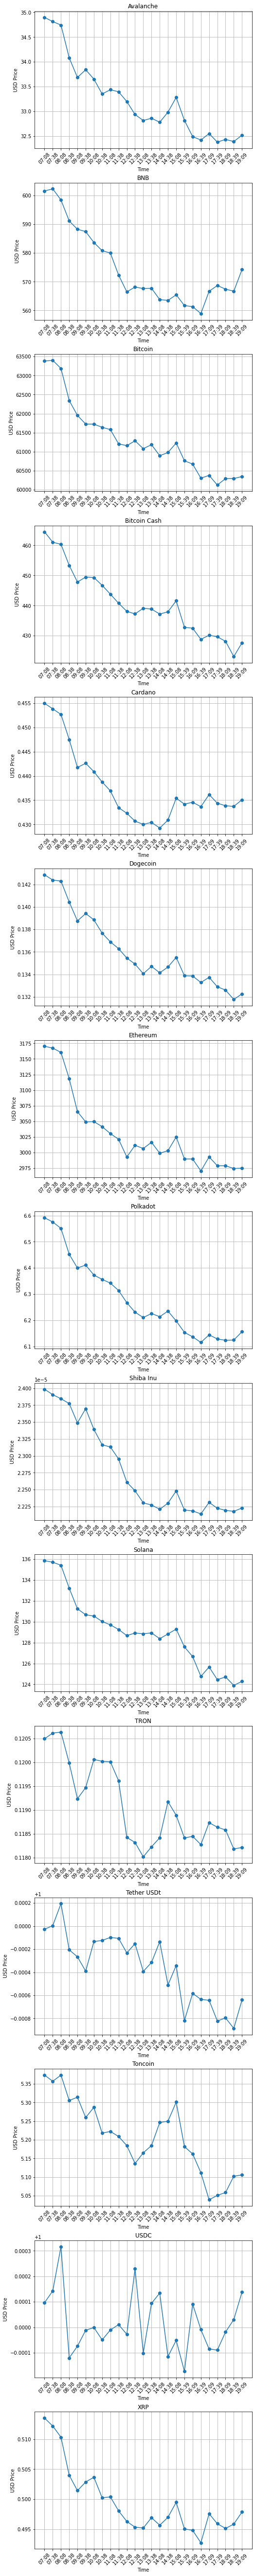

In [6]:
num_cols = len(df_pivot.columns)
fig, axes = plt.subplots(num_cols-1, 1, figsize=(8, 6*num_cols))
for i, column in enumerate(df_pivot.columns[1:]):
    ax = axes[i] if num_cols > 1 else axes  
    ax.plot(df_pivot.Timestamp_formatted, df_pivot[column], marker='o', linestyle='-')
    ax.set_title(column)
    ax.set_xlabel('Time')
    ax.set_ylabel('USD Price')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.subplots_adjust(hspace=0.25)  
plt.show()

**Percent Change** <br/>
The dataset includes not only the current price but also the percentage price change over various time intervals: 1 hour, 24 hours, a week, a month, 60 days, and 90 days. <br/> We will utilize this information to analyze the extent of fluctuation for each cryptocurrency across different time frames.

In [7]:
# Let's calculate the mean value for each measure by grouping each currency
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.39296,-1.95072,-7.67267,-12.93923,-0.99574,42.68939
Ethereum,-0.50754,-4.35054,-5.28601,-16.24521,-11.17969,30.61108
Tether USDt,-0.00284,-0.03273,-0.08053,-0.05472,-0.06858,-0.00452
BNB,-0.41898,-2.27966,-5.15702,-4.89268,41.60751,88.91938
Solana,-0.71461,-4.59931,-17.32074,-34.34087,-2.93947,28.55935
USDC,0.00223,-0.00413,-0.00688,-0.00316,0.01350,-0.02038
XRP,-0.25593,-1.79267,-8.81788,-20.32022,-15.54746,-1.64487
Dogecoin,-0.61338,-3.82890,-14.72141,-34.86954,9.18998,71.54002
Toncoin,-0.35211,-0.92705,-7.88071,0.30309,89.81085,150.42273


In [8]:
# Stacking and converting to a df
df3 = df2.stack().to_frame(name='values')
df3

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.39296
             quote.USD.percent_change_24h  -1.95072
             quote.USD.percent_change_7d   -7.67267
             quote.USD.percent_change_30d -12.93923
             quote.USD.percent_change_60d  -0.99574
             quote.USD.percent_change_90d  42.68939
Ethereum     quote.USD.percent_change_1h   -0.50754
             quote.USD.percent_change_24h  -4.35054
             quote.USD.percent_change_7d   -5.28601
             quote.USD.percent_change_30d -16.24521
             quote.USD.percent_change_60d -11.17969
             quote.USD.percent_change_90d  30.61108
Tether USDt  quote.USD.percent_change_1h   -0.00284
             quote.USD.percent_change_24h  -0.03273
             quote.USD.percent_change_7d   -0.08053
             quote.USD.percent_change_30d  -0.05472
             quote.USD.percent_change_60d  -0.06858
             quote.USD.percent_change_90d  -0.00452
BNB          quote.USD.percent_change_1h   -0.41898
             quote.USD.percent_change_24h  -2.27966
             quote.USD.percent_change_7d   -5.15702
             quote.USD.percent_change_30d  -4.89268
             quote.USD.percent_change_60d  41.60751
             quote.USD.percent_change_90d  88.91938
Solana       quote.USD.percent_change_1h   -0.71461
             quote.USD.percent_change_24h  -4.59931
             quote.USD.percent_change_7d  -17.32074
             quote.USD.percent_change_30d -34.34087
             quote.USD.percent_change_60d  -2.93947
             quote.USD.percent_change_90d  28.55935
USDC         quote.USD.percent_change_1h    0.00223
             quote.USD.percent_change_24h  -0.00413
             quote.USD.percent_change_7d   -0.00688
             quote.USD.percent_change_30d  -0.00316
             quote.USD.percent_change_60d   0.01350
             quote.USD.percent_change_90d  -0.02038
XRP          quote.USD.percent_change_1h   -0.25593
             quote.USD.percent_change_24h  -1.79267
             quote.USD.percent_change_7d   -8.81788
             quote.USD.percent_change_30d -20.32022
             quote.USD.percent_change_60d -15.54746
             quote.USD.percent_change_90d  -1.64487
Dogecoin     quote.USD.percent_change_1h   -0.61338
             quote.USD.percent_change_24h  -3.82890
             quote.USD.percent_change_7d  -14.72141
             quote.USD.percent_change_30d -34.86954
             quote.USD.percent_change_60d   9.18998
             quote.USD.percent_change_90d  71.54002
Toncoin      quote.USD.percent_change_1h   -0.35211
             quote.USD.percent_change_24h  -0.92705
             quote.USD.percent_change_7d   -7.88071
             quote.USD.percent_change_30d   0.30309
             quote.USD.percent_change_60d  89.81085
             quote.USD.percent_change_90d 150.42273
Cardano      quote.USD.percent_change_1h   -0.36285
             quote.USD.percent_change_24h  -3.52717
             quote.USD.percent_change_7d  -14.44972
             quote.USD.percent_change_30d -32.47276
             quote.USD.percent_change_60d -35.86644
             quote.USD.percent_change_90d -13.65303
Shiba Inu    quote.USD.percent_change_1h   -0.61945
             quote.USD.percent_change_24h  -3.15039
             quote.USD.percent_change_7d  -15.18725
             quote.USD.percent_change_30d -25.13089
             quote.USD.percent_change_60d  68.03989
             quote.USD.percent_change_90d 151.58529
Avalanche    quote.USD.percent_change_1h   -0.55556
             quote.USD.percent_change_24h  -1.97541
             quote.USD.percent_change_7d  -13.93438
             quote.USD.percent_change_30d -38.04065
             quote.USD.percent_change_60d -21.22753
             quote.USD.percent_change_90d  -4.59914
TRON         quote.USD.percent_change_1h   -0.13586
             quote.USD.percent_change_24h   0.38278
             quote.USD.percent_change_7d    5.79075
             quote.USD.percent_change_30d

In [9]:
#Resetting the index
df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.39296
1,Bitcoin,quote.USD.percent_change_24h,-1.95072
2,Bitcoin,quote.USD.percent_change_7d,-7.67267
3,Bitcoin,quote.USD.percent_change_30d,-12.93923
4,Bitcoin,quote.USD.percent_change_60d,-0.99574
5,Bitcoin,quote.USD.percent_change_90d,42.68939
6,Ethereum,quote.USD.percent_change_1h,-0.50754
7,Ethereum,quote.USD.percent_change_24h,-4.35054
8,Ethereum,quote.USD.percent_change_7d,-5.28601
9,Ethereum,quote.USD.percent_change_30d,-16.24521


In [10]:
# Renaming the columns
df5 = df4.rename(columns={'level_1': 'percent_change'})
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,-0.39296
1,Bitcoin,24h,-1.95072
2,Bitcoin,7d,-7.67267
3,Bitcoin,30d,-12.93923
4,Bitcoin,60d,-0.99574
5,Bitcoin,90d,42.68939
6,Ethereum,1h,-0.50754
7,Ethereum,24h,-4.35054
8,Ethereum,7d,-5.28601
9,Ethereum,30d,-16.24521


## Visualization

We are using matplotlib and seaborn libraries to create the visualizations. <br/>
Let's first examine how each currency evolved in different time periods.

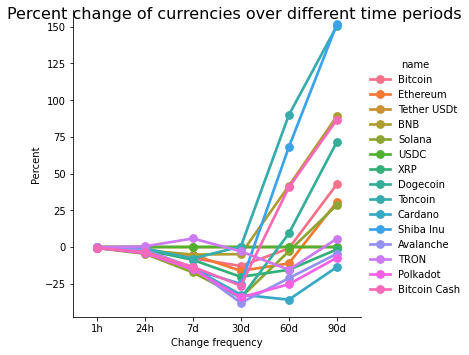

In [11]:
catplot = sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')

# Setting the title and axis labels
catplot.fig.suptitle('Percent change of currencies over different time periods', fontsize=16)  
catplot.set_axis_labels('Change frequency', 'Percent')   

# Show the plot
plt.show()

Next, let's examine how the changes occured for each time period.

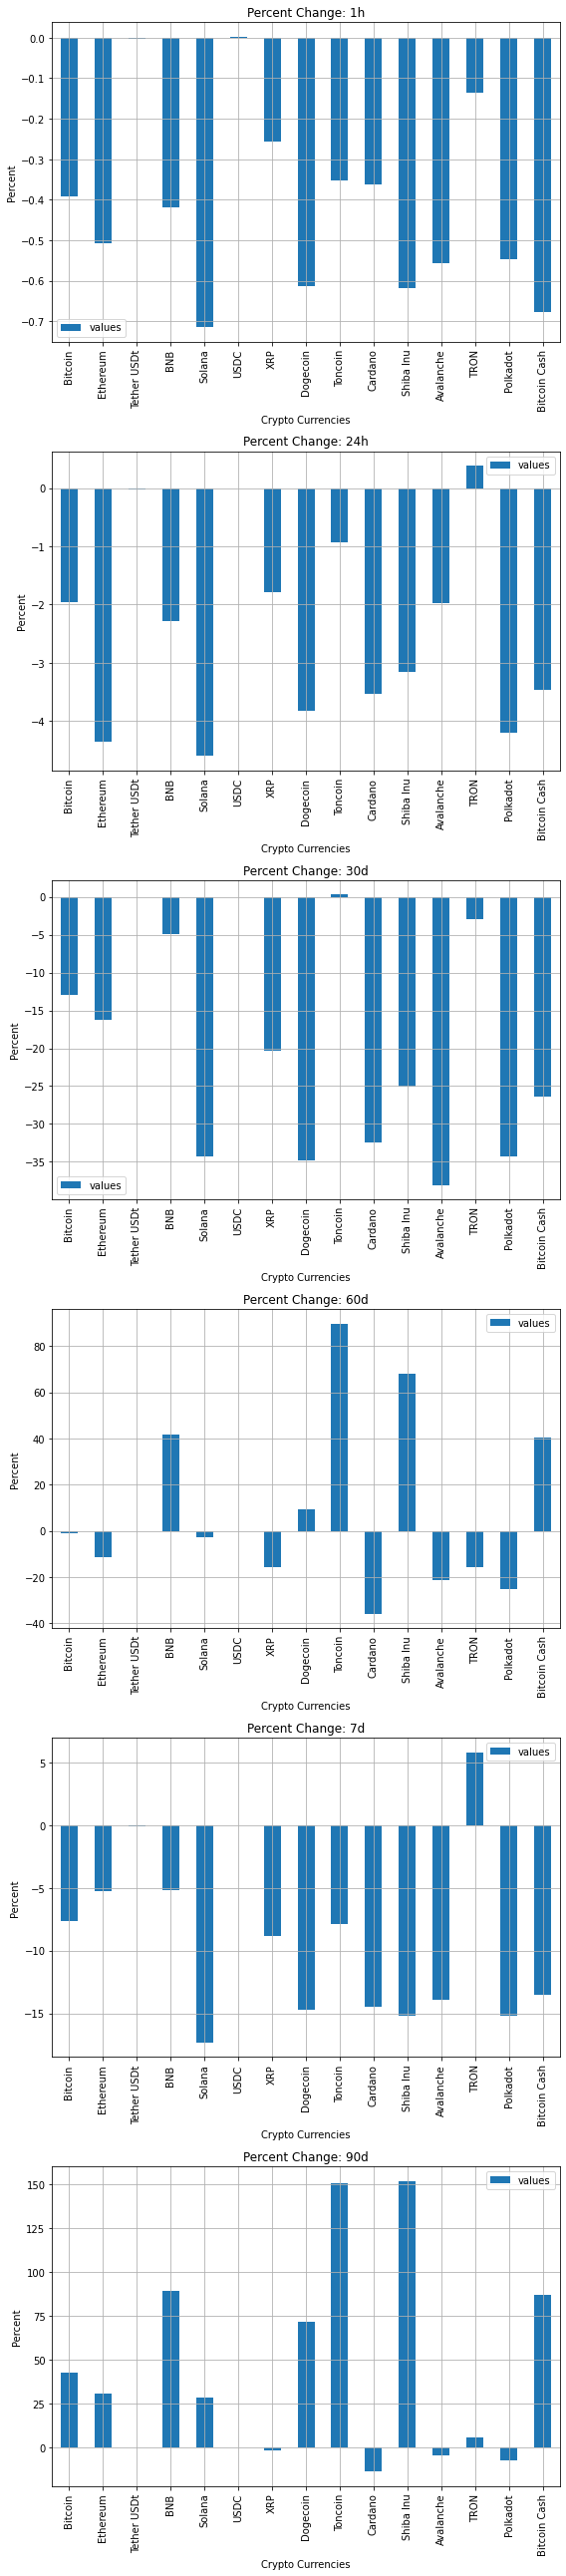

In [12]:
df6 = df5.groupby('percent_change')

# Create subplots for each group
fig, axes = plt.subplots(len(df6), 1, figsize=(8, 6*len(df6)))

# Iterate over the groups and plot each group on a separate subplot
for i, (percent_change, group_df) in enumerate(df6):
    ax = axes[i] if len(df6) > 1 else axes  # If there's only one group, axes is not an array
    group_df.plot(x='name', y='values', ax=ax, kind='bar', title=f'Percent Change: {percent_change}')
    ax.set_xlabel('Crypto Currencies')
    ax.set_ylabel('Percent')
    ax.grid(True)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()

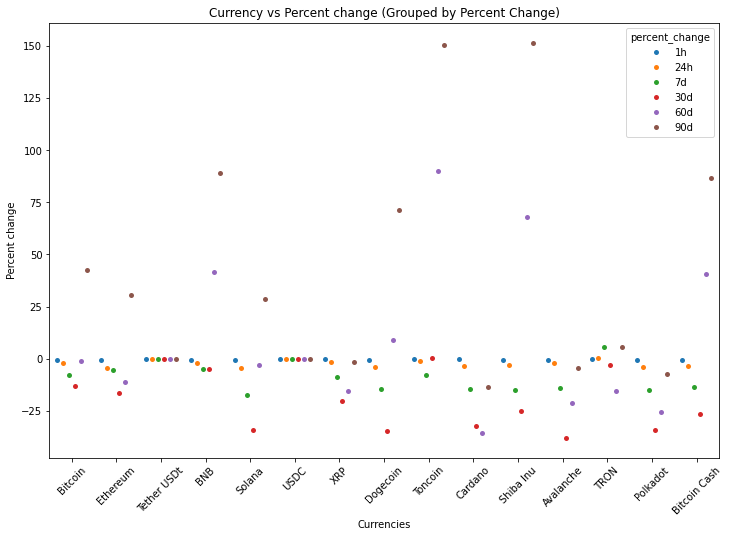

In [13]:
plt.figure(figsize=(12, 8))  
sns.stripplot(x='name', y='values', hue='percent_change', data=df5, dodge=True)

# Set the title and axis labels
plt.title('Currency vs Percent change (Grouped by Percent Change)')
plt.xlabel('Currencies')
plt.ylabel('Percent change')


plt.xticks(rotation=45)

# Show the plot
plt.show()